<a href="https://colab.research.google.com/github/zia207/01_Generalized_Linear_Models_Python/blob/main/Notebook/02_01_07_01_glm_non_normal_gamma_regression_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# Gamma Regression Tutorial in Python

Gamma regression is a powerful statistical method for modeling positive, continuous data with a skewed distribution, particularly when variability increases with the mean. It is commonly used in insurance claims, healthcare costs, and rainfall data, where values are non-negative and right-skewed. This tutorial will explore Gamma regression in Python through two main approaches. First, we will manually build a Gamma regression model to understand its underlying mechanics, including the log-likelihood function and parameter optimization. Then, we will utilize Python's `statsmodels` library to simplify the modeling process and demonstrate practical result interpretation. By the end of this tutorial, you will understand how to apply Gamma regression to real-world data by coding from scratch and using Python's built-in functions.

## Overview

Gamma regression is used for modeling positive, continuous data where the variance increases with the mean. It assumes that the response variable $y$ follows a Gamma distribution, often appropriate for modeling non-negative skewed data, such as response times, rainfall, or insurance claims. Here's a step-by-step explanation:

***Understanding the Gamma Distribution***

The Gamma distribution is defined by two parameters: - **Shape parameter** ($k$): Controls the shape or skewness. - **Rate parameter** ($theta$): Controls the spread.

The probability density function (PDF) of the Gamma distribution for a positive variable $y$ is:

$$ f(y; k, \theta) = \frac{y^{k - 1} e^{-\frac{y}{\theta}}}{\theta^k \Gamma(k)} $$

where $\Gamma(k)$ is the Gamma function, and both $k$ and $\theta$ are positive.

In Gamma regression, we typically work with the **mean** $\mu = k\theta$, rather than the shape and rate parameters directly. So, for a response variable $y$, we model $y \sim \text{Gamma}(\mu, \theta)$.

***Defining the Mean-Variance Relationship***

A key property of the Gamma distribution is that:

-   The **mean** of $y$ is $\mu$. -
-   The **variance** of $y$ is $\text{Var}(y) = \theta \mu^2$.

This means the variance grows with the square of the mean, which is helpful for modeling heteroscedastic data where larger values tend to have greater variance.

***Specifying the Link Function***

In Gamma regression, we assume that the mean $\mu$ of the response variable depends on the predictor variables $X$ through a **link function** $g(\cdot)$:

$$ g(\mu) = X \beta $$

Common choices for \$$g(\cdot)$ are:

-   **Log link**: $g(\mu) = \log(\mu)$

-   **Inverse link**: $g(\mu) = \frac{1}{\mu}$

The log link is the most common, ensuring that the predicted mean $\mu$ is always positive. With the log link, we get:

$\log(\mu) = X \beta \Rightarrow \mu = e\^{X \beta}$

***Setting Up the Likelihood Function***

Given $y_i$ as an observation from a Gamma distribution with mean $\mu_i$, we define the likelihood function based on the Gamma PDF. For (n) observations, the joint likelihood $L(\beta)$ is:

$$ L(\beta) = \prod\_{i=1}\^n \frac{y_i^{k - 1} e^{-\frac{y_i}{\theta}}}{\theta^k \Gamma(k)} $$

In practice, we usually work with the **log-likelihood**, which for a Gamma-distributed $y_i$ with mean $\mu_i$ can be expressed as:

$$ \log L(\beta) = \sum_{i=1}^n \left( (k - 1) \log(y_i) - \frac{y_i}{\theta} - k \log(\theta) - \log(\Gamma(k)) \right)  $$

***Estimating the Parameters***

To estimate $\beta$, we maximize the log-likelihood function with respect to $\beta$ using an iterative optimization algorithm, such as **iteratively reweighted least squares (IRLS)** in a generalized linear model (GLM) framework.

For example, with the log link function, we solve for ( \beta ) by maximizing:

$$ \sum_{i=1}^n \left( (k - 1) \log(y_i) - \frac{y_i}{e^{X_i \beta} \cdot k} - k \log(\theta) - \log(\Gamma(k)) \right)  $$

Using statistical software, you can estimate $\beta$ without calculating derivatives manually, as most packages handle this for you.

***Making Predictions***

Once the parameters $\beta$ are estimated, predictions can be made using the fitted model:

$$ \hat{\mu} = e^{X \hat{\beta}} $$


### When to Use Gamma Regression

 Gamma regression is typically suitable when: - The response variable is positive and continuous. - The data is right-skewed (meaning that there are more lower values, with a few higher outliers). - The variance increases with the mean, which is common in real-world data, especially in economics and biological sciences.

-   In cases where these conditions are met, a Gamma regression model can accurately capture the data’s behavior, offering a flexible approach for prediction and inference.

Here are some common types of data and use cases where Gamma regression is a good choice:

1.  **Monetary Data (Costs, Claims, Expenses)**

-   **Insurance claims**: The size of insurance claims often follows a Gamma-like distribution since claims are always positive and skewed, with few very high claims.
-   **Healthcare costs**: Medical expenses for treatments or hospital stays often have a Gamma distribution, with many low-cost cases and fewer high-cost ones.
-   **Sales or revenue data**: Especially for per-customer sales or revenue data, where amounts tend to vary widely and have a positive skew.

2.  **Duration or Survival Data**

-   **Time until an event**: For example, time until an employee leaves a job (employee turnover), or time until a product breaks or needs repair.
-   **Waiting times**: For instance, waiting times in queues, customer service, or transportation are often positive, with a few very long waits.

3.  **Biological and Environmental Measurements**

-   **Reaction times**: In psychology and neuroscience, reaction times are often Gamma-distributed, as they are positive, continuous, and can vary widely.
-   **Rainfall amounts**: Daily rainfall amounts are non-negative and positively skewed, with many days of low rainfall and a few days with very high amounts.
-   **Chemical concentration levels**: The concentration of a particular chemical in samples, which might have a skewed, positive distribution.

4.  **Reliability and Engineering Data**

-   **Failure times**: In engineering and reliability studies, the time until a component or system fails is often modeled with a Gamma distribution.
-   **Load data**: The amount of load or stress a system can handle before failure, which can vary and has a skewed distribution.

## Gamma Regression Model from Scratch

1. Generate synthetic data that follows a Gamma distribution.
2. Set up a simple Gamma regression model using a log link function.
3. Implement the model's parameter estimation using maximum likelihood.

Here’s the code, along with an explanation of each step.

### Generate Synthetic Gamma Data

We'll generate synthetic data where the response variable \( y \) is Gamma-distributed, with the mean modeled as a function of a predictor variable \( x \) and some known coefficients.

In [ ]:
import numpy as np
from scipy.stats import gamma
import pandas as pd

# Set a seed for reproducibility
np.random.seed(42)

# Generate predictor variable x
n = 100
x = np.random.uniform(0, 5, n)  # x ranges from 0 to 5

# Define true coefficients for the linear model (log-link)
beta0 = 1.5  # Intercept
beta1 = 0.5  # Slope

# Calculate mean response based on x and the coefficients, with log link
mu = np.exp(beta0 + beta1 * x)

# Define shape parameter for the Gamma distribution
k = 2  # shape parameter for the Gamma distribution

# Generate response variable y with Gamma distributed noise
y = gamma.rvs(a=k, scale=mu/k, size=n)  # scale = mean / shape

### Define the Log-Likelihood Function

To estimate the coefficients $\beta$ of the Gamma regression model, we need to define the log-likelihood function. We will only need the terms involving $\beta$, where $\mu_i = e^{X \beta}$. The log-likelihood function for a single observation $y_i$ is:

In [ ]:
from scipy.special import gammaln

def log_likelihood(beta, x, y, k):
    # Calculate the predicted mean (log-link function)
    mu_pred = np.exp(beta[0] + beta[1] * x)

    # Calculate the log-likelihood for each observation and sum
    ll = np.sum((k - 1) * np.log(y) - y * (k / mu_pred) - k * np.log(mu_pred) - gammaln(k))
    return -ll  # Return negative log-likelihood for minimization

### Estimate Parameters by Maximizing the Log-Likelihood

Now we’ll use `scipy.optimize.minimize` to minimize the negative log-likelihood and estimate the coefficients \( \beta_0 \) and \( \beta_1 \).

In [ ]:
from scipy.optimize import minimize

# Initial guesses for beta coefficients
initial_guess = np.array([0, 0])

# Use minimize to find the values of beta that minimize the negative log-likelihood
result = minimize(log_likelihood, initial_guess, args=(x, y, k), method='Nelder-Mead')

# Extract estimated coefficients
beta_est = result.x
print("Estimated coefficients:")
print(f"beta0 (Intercept): {beta_est[0]}")
print(f"beta1 (Slope): {beta_est[1]}")

Estimated coefficients:
beta0 (Intercept): 1.3131949185951486
beta1 (Slope): 0.5585555396879279


### Make Predictions

With the estimated coefficients, we can predict the mean response \( \hat{\mu} \) for new values of \( x \).

In [ ]:
# Predicted mean for the original data
mu_pred = np.exp(beta_est[0] + beta_est[1] * x)

# Create a DataFrame to compare predicted vs actual values
results_df = pd.DataFrame({'x': x, 'y': y, 'predicted_mu': mu_pred})
print(results_df.head())

          x          y  predicted_mu
0  1.872701  10.182887     10.582505
1  4.753572  31.608466     52.896048
2  3.659970  19.540515     28.717057
3  2.993292  21.734989     19.788777
4  0.780093   2.732708      5.748393


### Prediction Performance

In [ ]:
# Performance metrics
MAE = np.mean(np.abs(y - mu_pred))  # Mean Absolute Error
MSE = np.mean((y - mu_pred)**2)  # Mean Squared Error
SS_res = np.sum((y - mu_pred)**2)  # Residual sum of squares
SS_tot = np.sum((y - np.mean(y))**2)  # Total sum of squares
R_squared = 1 - SS_res / SS_tot  # R-squared

# Summary statistics table
summary_table = pd.DataFrame({
    'Metric': ['Intercept (beta0)', 'Slope (beta1)', 'MAE', 'MSE', 'R-squared'],
    'Value': [beta_est[0], beta_est[1], MAE, MSE, R_squared]
})
print("\nSummary Statistics Table:")
print(summary_table)


Summary Statistics Table:
              Metric       Value
0  Intercept (beta0)    1.313195
1      Slope (beta1)    0.558556
2                MAE    8.837378
3                MSE  232.970823
4          R-squared    0.458091


### Cross-validation

Let's implement k-fold cross-validation to evaluate the performance of our Gamma regression model. Cross-validation splits the dataset into \( k \) subsets (or "folds") and uses each fold in turn for validation while training the model on the remaining \( k-1 \) folds.

In [ ]:
from sklearn.model_selection import KFold

# Set seed for reproducibility
np.random.seed(42)

# Define the number of folds
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define a function to calculate Mean Squared Error (MSE)
def mse(actual, predicted):
    return np.mean((actual - predicted)**2)

# Initialize vector to store MSE for each fold
mse_values = []

for train_index, test_index in kf.split(x):
    # Split data into training and validation sets
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define the log-likelihood function for the training set
    def log_likelihood_train(beta):
        mu_pred = np.exp(beta[0] + beta[1] * x_train)
        ll = np.sum((k - 1) * np.log(y_train) - y_train * (k / mu_pred) - k * np.log(mu_pred) - gammaln(k))
        return -ll

    # Estimate parameters using training data
    result = minimize(log_likelihood_train, initial_guess, method='Nelder-Mead')
    beta_est = result.x

    # Make predictions on the test set
    mu_pred_test = np.exp(beta_est[0] + beta_est[1] * x_test)

    # Calculate MSE for this fold and store it
    mse_values.append(mse(y_test, mu_pred_test))

# Calculate average MSE across all folds
average_mse = np.mean(mse_values)

# Display results
print("MSE for each fold:")
print(mse_values)
print(f"Average MSE across folds: {average_mse}")

MSE for each fold:
[np.float64(106.22782123232312), np.float64(246.81246930342155), np.float64(104.85685916814666), np.float64(430.1628176760074), np.float64(335.39943026947867)]
Average MSE across folds: 244.6918795298755


## Gamma Regression in Python

Gamma regression is implemented in Python using the `statsmodels` library, which fits generalized linear models (GLMs) with various distributions and link functions. To perform Gamma regression in Python, you need to specify the `family=sm.families.Gamma(link=sm.families.links.log())` argument in the `GLM` function. Here’s a step-by-step guide to fitting a Gamma regression model in Python:

### Install Required Python Packages

The following Python packages are required to run this tutorial. You can install them using pip if they are not already installed:

In [ ]:
import sys
!{sys.executable} -m pip install numpy pandas statsmodels sklearn matplotlib seaborn scipy

### Load Python Packages

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

### Data

In this tutorial, we will use the [Insurance Premium Data](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset) dataset. This dataset consists of the following fields:
- `age`: The age column ranges from 18 to 64 years, which is the typical working age range for health insurance beneficiaries.
- `sex`: The sex column contains two unique values, likely male and female.
- `bmi` (Body Mass Index): The BMI column values range from 15.96 to 53.13, covering a wide range of body mass indices.
- `children`: The children column indicates that beneficiaries have between 0 and 5 children/dependents covered by their insurance.
- `smoker`: The smoker column contains two unique values, indicating whether the beneficiary is a smoker or not.
- `region`: The region column has four unique values, corresponding to the four regions in the US where beneficiaries are located.
- `charges`: The charges column, a continuous variable, ranges from 1121.87 to 63770.43, indicating a wide range of individual medical costs billed by health insurance.

We will use `pandas` to load the data:

In [ ]:
# Load data
import pandas as pd

url = "https://raw.githubusercontent.com/zia207/Data/main/CSV_files/insurance_premium.csv"
mf = pd.read_csv(url)
print(mf.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


This **Insurance Premium Dataset** is a good candidate for Gamma regression because:
1. **Continuous and Positive Target Variable**: The `charges` variable, representing medical costs or insurance premiums, is continuous and strictly positive.
2. **Skewed Distribution of Charges**: Insurance costs often have a right-skewed distribution, with a few high-cost cases driving up the mean.
3. **Variance Increases with Mean**: Higher expected charges often come with greater variability, matching the Gamma distribution's properties.
4. **Predictors with Log-Linear Relationships**: The log link function captures multiplicative relationships between predictors (e.g., age, BMI, smoker status) and expected charges.

### Data Processing

The dataset contains BMI values, calculated as a person's weight (in kilograms) divided by the square of their height (in meters). We will categorize these values into four classes according to the [CDC recommendation](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html):
- `Underweight`: Less than 18.5
- `Healthy Weight`: 18.5 to less than 25
- `Overweight`: 25 to less than 30
- `Obesity`: 30 or greater

In [ ]:
# Categorize BMI
mf['bmi_categories'] = pd.cut(mf['bmi'],
                              bins=[-float('inf'), 18.5, 25, 29.9, float('inf')],
                              labels=['underweight', 'normal', 'overweight', 'obesity'])

### Convert to Categorical

In [ ]:
# Convert to categorical
mf['sex'] = mf['sex'].astype('category')
mf['smoker'] = mf['smoker'].astype('category')
mf['region'] = mf['region'].astype('category')

### Data Description

We use `describe()` to diagnose all variables and `seaborn` to visualize the distribution of expenses.

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.665471     1.094918    NaN        NaN   
std       14.049960   NaN     6.098382     1.205493    NaN        NaN   
min       18.000000   NaN    16.000000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.300000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.700000     2.000000    NaN        NaN   
max       64.000000   NaN    53.100000     5.000000    NaN        NaN   

            expenses bmi_categories  
count    1338.000000           1338  
unique           NaN              4  
top      

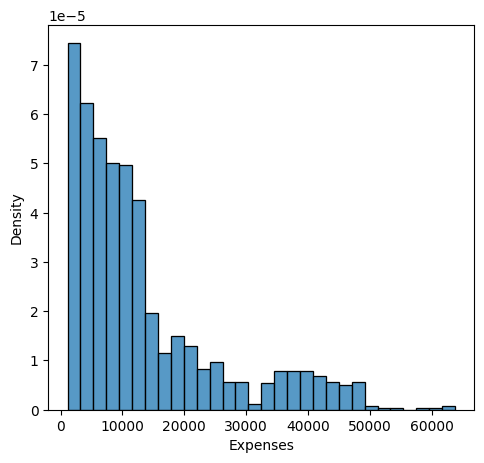

Skewness of expenses: 1.5141797167430497


In [ ]:
# General diagnosis of all variables
print(mf.describe(include='all'))

# Plot histogram of expenses
plt.figure(figsize=(5.5, 5))
sns.histplot(mf['expenses'], stat='density')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.show()

# Calculate skewness
from scipy.stats import skew
print(f"Skewness of expenses: {skew(mf['expenses'])}")

The high positive skewness indicates a right-skewed distribution, with some individuals having high expenses (>20,000) in health insurance.

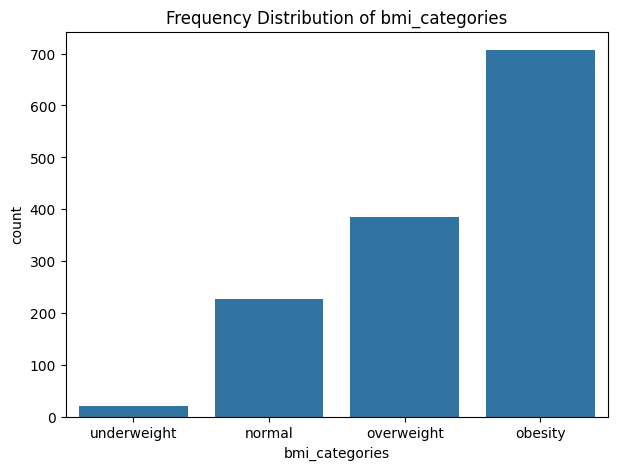

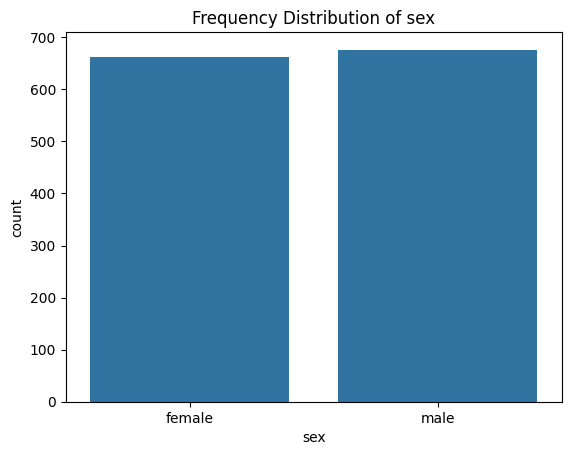

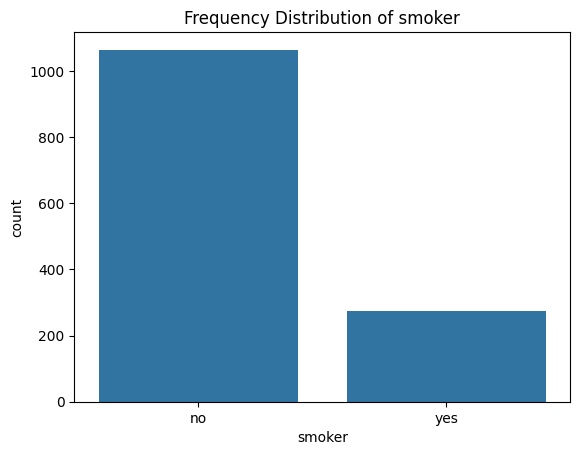

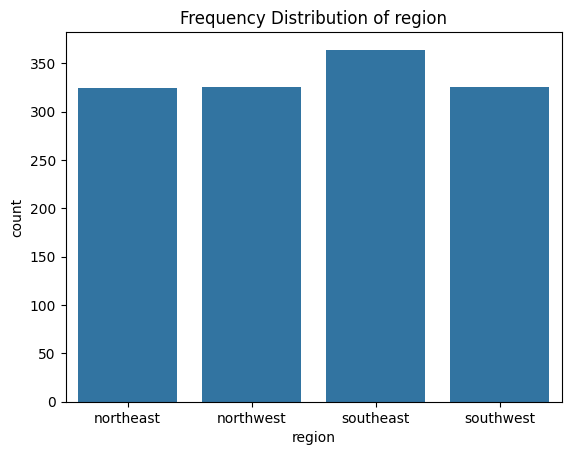

In [ ]:
# Plot frequency distribution of categorical variables
plt.figure(figsize=(7, 5))
for column in ['bmi_categories', 'sex', 'smoker', 'region']:
    sns.countplot(data=mf, x=column)
    plt.title(f'Frequency Distribution of {column}')
    plt.show()

### Split Data

We split the data into training (70%) and testing (30%) sets, stratified by `bmi_categories` and `sex`.

In [ ]:
# Stratified split
train = mf.groupby(['bmi_categories', 'sex']).sample(frac=0.7, random_state=101)
test = mf.drop(train.index)

/tmp/ipykernel_13072/4098815498.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train = mf.groupby(['bmi_categories', 'sex']).sample(frac=0.7, random_state=101)


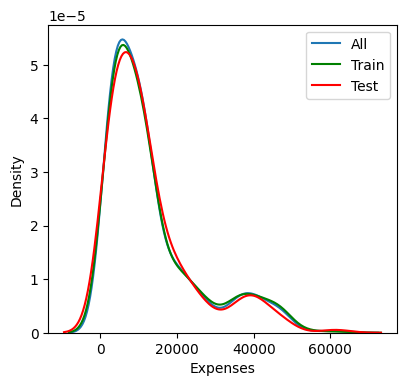

In [ ]:
# Density plot of all, train, and test data
plt.figure(figsize=(4.5, 4))
sns.kdeplot(data=mf, x='expenses', label='All')
sns.kdeplot(data=train, x='expenses', label='Train', color='green')
sns.kdeplot(data=test, x='expenses', label='Test', color='red')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.legend()
plt.show()

## Fit a Gamma Model in Python

### Only Intercept Model

First, we fit a Gamma model with intercept only, modeling the data with no predictors. We use the log link function.

In [ ]:
# Fit the intercept-only Gamma model
inter_gamma = smf.glm(formula='expenses ~ 1', data=train, family=sm.families.Gamma(link=sm.families.links.log())).fit()
print(inter_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               expenses   No. Observations:                  938
Model:                            GLM   Df Residuals:                      937
Model Family:                   Gamma   Df Model:                            0
Link Function:                    log   Scale:                         0.83290
Method:                          IRLS   Log-Likelihood:                -9832.1
Date:                Tue, 16 Sep 2025   Deviance:                       744.92
Time:                        20:30:34   Pearson chi2:                     780.
No. Iterations:                     7   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5067      0.030    319.034      0.0

/home/zia207/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


The null and residual deviance are identical in the intercept-only model. Exponentiating the intercept gives the overall mean of `charges`:

In [ ]:
# Exponentiate intercept to get the mean
print(f"Mean of expenses: {np.exp(inter_gamma.params['Intercept'])}")

Mean of expenses: 13450.202761193972


The dispersion parameter can be estimated from the deviance and degrees of freedom:

In [ ]:
# Calculate dispersion parameter
deviance_val = inter_gamma.deviance
residual_df = inter_gamma.df_resid
dispersion_parameter = deviance_val / residual_df
print(f"Dispersion parameter: {dispersion_parameter}")

# Estimate shape and scale
inter_gamma_shape = 1 / dispersion_parameter
inter_gamma_scale = np.exp(inter_gamma.params['Intercept']) / inter_gamma_shape
print(f"Shape: {inter_gamma_shape}")
print(f"Scale: {inter_gamma_scale}")

Dispersion parameter: 0.7950091085363027
Shape: 1.257847223714339
Scale: 10693.033706809338


Plot the estimated Gamma distribution on top of a histogram of the observed data:

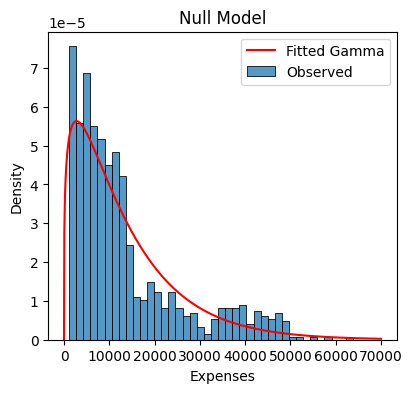

In [ ]:
plt.figure(figsize=(4.5, 4))
sns.histplot(train['expenses'], bins=40, stat='density', label='Observed')
x = np.linspace(0, 70000, 1000)
plt.plot(x, gamma.pdf(x, a=inter_gamma_shape, scale=inter_gamma_scale), 'r-', label='Fitted Gamma')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.title('Null Model')
plt.legend()
plt.show()

### Full Model

Now, let’s fit a Gamma regression model predicting charges using `age`, `sex`, `bmi_categories`, `children`, `smoker`, and `region`.

In [ ]:
# Fit the full Gamma model
fit_gamma = smf.glm(formula='expenses ~ bmi_categories + sex + smoker + region + children + age',
                    data=train,
                    family=sm.families.Gamma(link=sm.families.links.log())).fit()
print(fit_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               expenses   No. Observations:                  938
Model:                            GLM   Df Residuals:                      927
Model Family:                   Gamma   Df Model:                           10
Link Function:                    log   Scale:                         0.41161
Method:                          IRLS   Log-Likelihood:                -9288.7
Date:                Tue, 16 Sep 2025   Deviance:                       219.13
Time:                        20:31:00   Pearson chi2:                     382.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.7438
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/home/zia207/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


### Check the Overall Model Fit

Compare the null and full models using a likelihood ratio test:

In [ ]:
from scipy.stats import chi2
lr_stat = 2 * (fit_gamma.llf - inter_gamma.llf)
df_diff = fit_gamma.df_model - inter_gamma.df_model
p_value = chi2.sf(lr_stat, df_diff)
print(f"Chi-square: {lr_stat:.2f}, p-value: {p_value:.4f}")

Chi-square: 1086.76, p-value: 0.0000


A low p-value (<0.0001) indicates that the model with predictors is significantly better than the intercept-only model.

### Shape and Scale of the Fitted Model

In [ ]:
# Calculate mean and variance of predicted values
predicted_mu = fit_gamma.fittedvalues
mean_mu = np.mean(predicted_mu)
var_mu = np.var(predicted_mu)

# Estimate shape (k) and scale (theta)
shape_estimate = mean_mu**2 / var_mu
scale_estimate = var_mu / mean_mu
print(f"Estimated shape (k): {shape_estimate}")
print(f"Estimated scale (theta): {scale_estimate}")

Estimated shape (k): 0.9798149749461349
Estimated scale (theta): 14552.14654812722


Plot the estimated Gamma distribution:

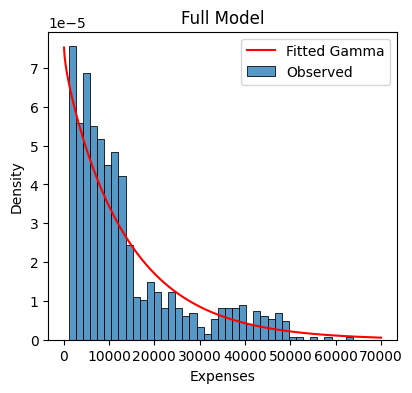

In [ ]:
plt.figure(figsize=(4.5, 4))
sns.histplot(train['expenses'], bins=40, stat='density', label='Observed')
plt.plot(x, gamma.pdf(x, a=shape_estimate, scale=scale_estimate), 'r-', label='Fitted Gamma')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.title('Full Model')
plt.legend()
plt.show()

### Model Performance

In [ ]:
# Calculate performance metrics
y_pred = fit_gamma.fittedvalues
y_true = train['expenses']
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 4687.550323525501
MSE: 68055305.27161145
R-squared: 0.5478570144960268


### Cross-validation

We’ll use 5-fold cross-validation to evaluate the model's predictive performance using Mean Squared Error (MSE).

In [ ]:
# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_values = []

for train_index, test_index in kf.split(mf):
    train_data = mf.iloc[train_index]
    test_data = mf.iloc[test_index]

    # Fit the Gamma model on training data
    cv_model = smf.glm(formula='expenses ~ age + sex + bmi_categories + children + smoker + region',
                       data=train_data,
                       family=sm.families.Gamma(link=sm.families.links.log())).fit()

    # Predict on the validation set
    predictions = cv_model.predict(test_data)

    # Calculate MSE for the fold
    mse_values.append(mean_squared_error(test_data['expenses'], predictions))

# Average MSE across all folds
average_mse_cv = np.mean(mse_values)
print(f"Average MSE from cross-validation: {average_mse_cv}")

Average MSE from cross-validation: 61678804.80004237


/home/zia207/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zia207/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zia207/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/zia207/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.wa

### Prediction on Test Data

In [ ]:
# Predict on the test set
test['Pred_gamma'] = fit_gamma.predict(test)

### Prediction Performance

In [ ]:
# Calculate performance metrics on test set
my_metrics = {
    'R2': r2_score(test['expenses'], test['Pred_gamma']),
    'RMSE': np.sqrt(mean_squared_error(test['expenses'], test['Pred_gamma'])),
    'MAE': mean_absolute_error(test['expenses'], test['Pred_gamma']),
    'MBE': np.mean(test['Pred_gamma'] - test['expenses'])
}
print("Prediction performance metrics:")
for metric, value in my_metrics.items():
    print(f"{metric}: {value}")

Prediction performance metrics:
R2: 0.5024960792009842
RMSE: 8254.858411949182
MAE: 4387.265218117403
MBE: 821.4418879359797


### 1:1 Plot

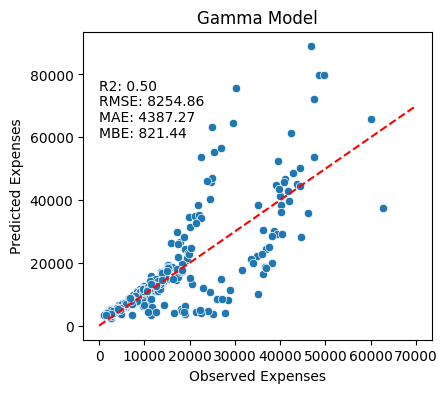

In [ ]:
plt.figure(figsize=(4.5, 4))
sns.scatterplot(x='expenses', y='Pred_gamma', data=test)
plt.plot([0, 70000], [0, 70000], 'r--')
plt.xlabel('Observed Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Gamma Model')
for metric, value in my_metrics.items():
    plt.text(10, 75000 - 5000 * list(my_metrics.keys()).index(metric), f"{metric}: {value:.2f}")
plt.show()

### Log Linear Model

Traditional linear modeling with a log transformation can be effective in some cases. We’ll use `statsmodels` to fit a linear model with the log-transformed response.

In [ ]:
# Fit the log-linear model
fit_lm = smf.ols(formula='np.log(expenses) ~ bmi_categories + sex + smoker + region + children + age',
                 data=train).fit()
print(fit_lm.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(expenses)   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     330.9
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          1.05e-297
Time:                        20:33:08   Log-Likelihood:                -541.55
No. Observations:                 938   AIC:                             1105.
Df Residuals:                     927   BIC:                             1158.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The coefficients are slightly different from the Gamma model, but the overall interpretation is similar.

## Summary and Conclusion

In this tutorial, we covered the essentials of Gamma regression in Python, focusing on a manual approach and implementation using `statsmodels`. We discussed when to use Gamma regression, particularly for non-negative, skewed data with increasing variance, common in finance, healthcare, environmental science, and engineering. Implementing Gamma regression from scratch helped us understand the model's mechanics, including the log-likelihood function and coefficient estimation. We then utilized `statsmodels` to fit a Gamma regression model efficiently, emphasizing its simplicity in estimating parameters and interpreting output metrics like coefficients, standard errors, and goodness-of-fit measures. Gamma regression is vital for analyzing non-negative continuous data with a right-skewed distribution. With the knowledge gained in this tutorial, you can effectively apply Gamma regression to various real-world datasets, providing accurate insights and predictions in fields such as claims costs, waiting times, and biological measurements.

## References

1. [Getting Started with Gamma Regression](https://library.virginia.edu/data/articles/getting-started-with-gamma-regression)
2. [Modeling skewed continuous outcome using Gamma family in glm()](https://rpubs.com/kaz_yos/glm-Gamma)
3. [Lecture 8: Gamma regression](https://www.math.cit.tum.de/fileadmin/w00ccg/math/Forschung/forschungsgruppen/statistics/academics/lec8.pdf)